Número de plantas detectadas: 29


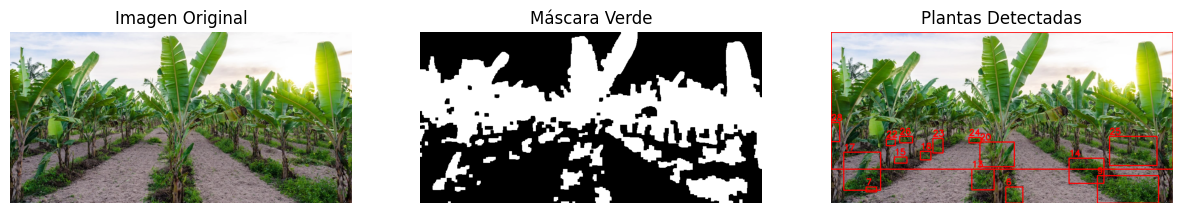

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar la imagen
img = cv2.imread(r"/cultivo platano.webp")
# Verificar si la imagen se cargó correctamente
if img is None:
    print("Error: No se pudo cargar la imagen. Asegúrate de que 'cultivo platano.webp' esté en el directorio correcto.")
else:
    # Convertir de BGR (OpenCV) a RGB (para visualización)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 2. Convertir a HSV para segmentar el color verde
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Rango de verdes (puede ajustarse según la iluminación)
    lower_green = np.array([30, 40, 40])
    upper_green = np.array([85, 255, 255])

    # 3. Crear máscara para lo verde
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # 4. Aplicar operaciones morfológicas para limpiar ruido
    kernel = np.ones((7,7), np.uint8)
    mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

    # 5. Detectar contornos de las plantas
    contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 6. Dibujar contornos y contar plantas
    output = img_rgb.copy()
    for i, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        if w*h > 300:  # filtro para evitar ruido muy pequeño
            cv2.rectangle(output, (x,y), (x+w, y+h), (255,0,0), 2)
            cv2.putText(output, str(i+1), (x, y-5), cv2.FONT_HERSHEY_SIMPLEX,
                        0.7, (255,0,0), 2)

    print("Número de plantas detectadas:", len(contours))

    # 7. Mostrar resultados
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1); plt.title("Imagen Original"); plt.imshow(img_rgb); plt.axis("off")
    plt.subplot(1,3,2); plt.title("Máscara Verde"); plt.imshow(mask_clean, cmap="gray"); plt.axis("off")
    plt.subplot(1,3,3); plt.title("Plantas Detectadas"); plt.imshow(output); plt.axis("off")
    plt.show()